# ***The code generate Word Clouds for tozenized and filtered Arabic text (Stop words, punctuation)***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Uploading the font file arial.ttf from the device to /content/drive/MyDrive/Colab Notebooks/Dataset Analysis
'''
from google.colab import files
import shutil

uploaded = files.upload()

for filename in uploaded.keys():
  dst_path = "/content/drive/MyDrive/Colab Notebooks/Dataset Analysis"
  shutil.move(filename, dst_path)

Saving arial.ttf to arial.ttf


*Requirements*

In [ ]:
!pip install wordcloud matplotlib arabic-reshaper
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import re
import ast  # Import ast for literal evaluation
from collections import Counter  # Import Counter for word frequency counting

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **VQAv2_ar Words cloud**

## Questions

### *Questions Tokenized with CAMeL and image saved with higher resolution*

**for train and validation files**

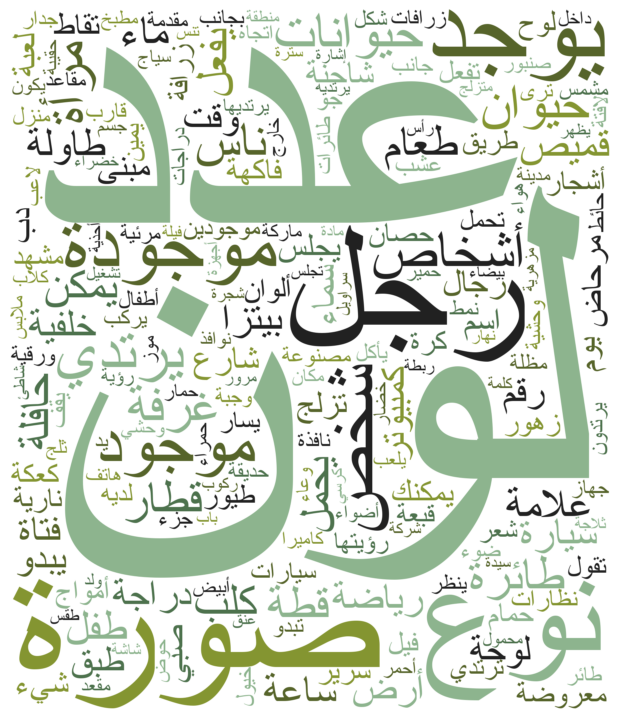

In [ ]:
import json
import re
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Paths to JSON files
json_file_paths = [
    "/content/drive/MyDrive/ColabData/VQAv2/VQAv2_Statistics/question_train_CAMeL_tokenized.json",
    "/content/drive/MyDrive/ColabData/VQAv2/VQAv2_Statistics/question_val_CAMeL_tokenized.json"
]

# Load Arabic stopwords
arabic_stopwords = set(stopwords.words('arabic'))
manuall_stopwords = set(["في","على","و","التي",'تاسع',"تاسع","الذي","هو","هي","غير","لماذا", "لهذا", "بهذا","أنه","إليه","اي","لأي","بهذه","لهذه","يتم","عليها","أعلى","تم","يسار","يمين"])
arabic_stopwords = arabic_stopwords.union(manuall_stopwords)
# Function to preprocess text
def preprocess_text(text):
    # Remove digits
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove English words
    text = re.sub(r"[a-zA-Z]+", "", text)
    # Remove Arabic stopwords and "ال" with conditions
    if text not in arabic_stopwords: #check if the token is not in stop words before doing any thing
        if text.startswith("ال") and len(text) > 2 and text not in arabic_stopwords:
          text = text[2:]
    else:
        text="" #make the token empty if it is in stop words
    return [text] if text else []

all_words = []
for file_path in json_file_paths:
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
        tokenized_questions = data.get('tokenized_questions', [])
        for question in tokenized_questions:
            for token in question:  # Iterate through each token
                processed_token = preprocess_text(token)  # Preprocess individually
                #Add if statement to consider the case when the preprocess return empty []
                if processed_token: #only extend if not empty
                  all_words.extend(processed_token)  # Extend if not empty

# Calculate word frequencies
word_frequencies = Counter(all_words)

# Define desired colors
colors = ['#8DB48E', '#4D724D', '#56642A', '#212121', '#849531']

# Define a function to cycle through the colors
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color_index = random_state.randint(0, len(colors) - 1)
    return colors[color_index]

# Generate the word cloud using word frequencies
wordcloud = WordCloud(width=1800, height=2100, background_color="white", stopwords=arabic_stopwords, font_path='/content/drive/MyDrive/Colab Notebooks/Dataset Analysis/arial.ttf', color_func=color_func).generate_from_frequencies(word_frequencies)

# Display and save the word cloud
plt.figure(figsize=(6, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("/content/drive/MyDrive/ColabData/VQAv2/VQAv2_Statistics/VQAv2-ar_questions_word_cloud_CAMeL_Tokenized_highResolution.jpg", dpi=300)  # Save as high resolution PNG
plt.show()
#wordcloud.to_file("wordcloud.png")  # Save to a file



---



## Answers

### *Answers Tokenized with CAMeL and image saved with higher resolution*

**Only train and devlopment files are included**

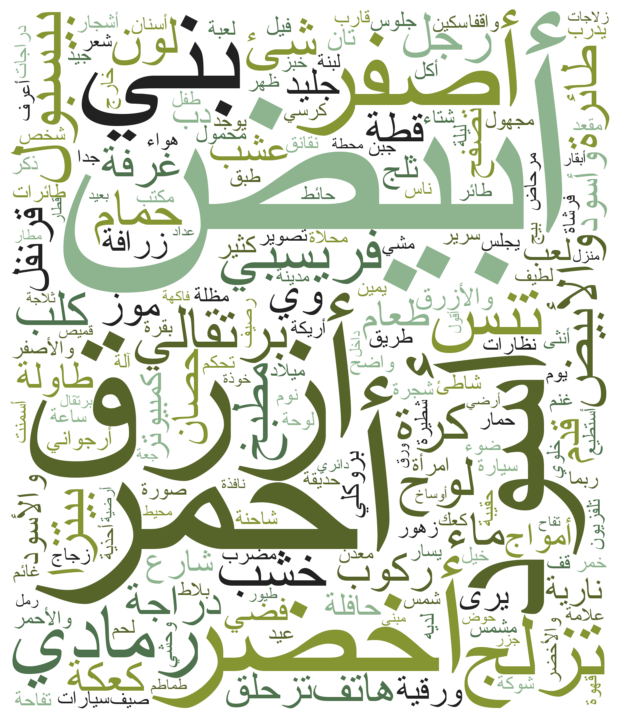

In [ ]:
import json
import re
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Paths to JSON files
json_file_paths = [
    "/content/drive/MyDrive/ColabData/VQAv2/VQAv2_Statistics/annotation_train_CAMeL_tokenized.json",
    "/content/drive/MyDrive/ColabData/VQAv2/VQAv2_Statistics/annotation_val_CAMeL_tokenized.json"
]

# Load Arabic stopwords
arabic_stopwords = set(stopwords.words('arabic'))
manuall_stopwords = set(["في","على","و","التي",'تاسع',"تاسع","الذي","هو","هي","غير","لماذا", "لهذا", "بهذا","أنه","إليه","اي","لأي","بهذه","لهذه","يتم","عليها","أعلى","تم","يسار","يمين",'يمين','يسار']) # Add more as needed
arabic_stopwords = arabic_stopwords.union(manuall_stopwords)
# Function to preprocess text
def preprocess_text(text):
    # Remove digits
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove English words
    text = re.sub(r"[a-zA-Z]+", "", text)
    # Remove Arabic stopwords and "ال" with conditions
    if text not in arabic_stopwords: #check if the token is not in stop words before doing any thing
        if text.startswith("ال") and len(text) > 2 and text not in arabic_stopwords:
          text = text[2:]
    else:
        text="" #make the token empty if it is in stop words
    return [text] if text else []

all_words = []
for file_path in json_file_paths:
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
        tokenized_answers = data.get('tokenized_answers', [])
        for question in tokenized_answers:
            for token in question:  # Iterate through each token
                processed_token = preprocess_text(token)  # Preprocess individually
                #Add if statement to consider the case when the preprocess return empty []
                if processed_token: #only extend if not empty
                  all_words.extend(processed_token)  # Extend if not empty

# Calculate word frequencies
word_frequencies = Counter(all_words)

# Define desired colors
colors = ['#8DB48E', '#4D724D', '#56642A', '#212121', '#849531']

# Define a function to cycle through the colors
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color_index = random_state.randint(0, len(colors) - 1)
    return colors[color_index]

# Generate the word cloud using word frequencies
wordcloud = WordCloud(width=1800, height=2100, background_color="white", stopwords=arabic_stopwords, font_path='/content/drive/MyDrive/Colab Notebooks/Dataset Analysis/arial.ttf', color_func=color_func).generate_from_frequencies(word_frequencies)

# Display and save the word cloud
plt.figure(figsize=(6, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("/content/drive/MyDrive/ColabData/VQAv2/VQAv2_Statistics/VQAv2-ar_answers_word_cloud_CAMeL_Tokenized_highResolution.jpg", dpi=300)  # Save as high resolution PNG
plt.show()
#wordcloud.to_file("wordcloud.png")  # Save to a file



---



# **OKVQA_ar Words cloud**

## Question

### *Questions Tokenized with CAMeL and image saved with higher resolution*

**Only train and devlopment files are included**

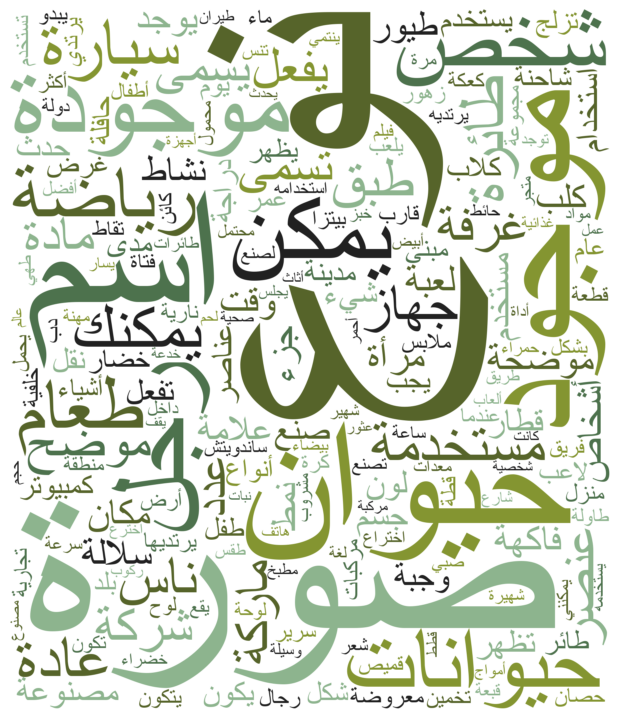

In [ ]:
import json
import re
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Paths to JSON files
json_file_paths = [
    "/content/drive/MyDrive/ColabData/OKVQA/OKVQA_Statistics/question_train_CAMeL_tokenized.json",
    "/content/drive/MyDrive/ColabData/OKVQA/OKVQA_Statistics/question_val_CAMeL_tokenized.json"
]

# Load Arabic stopwords
arabic_stopwords = set(stopwords.words('arabic'))
manuall_stopwords = set(["في","على","و","التي","الذي","هو","هي","غير","لماذا", "لهذا", "بهذا","أنه","إليه","اي","لأي","بهذه","لهذه","يتم","عليها","أعلى","تم","يسار","يمين"]) # Add more as needed
arabic_stopwords = arabic_stopwords.union(manuall_stopwords)
# Function to preprocess text
def preprocess_text(text):
    # Remove digits
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove English words
    text = re.sub(r"[a-zA-Z]+", "", text)
    # Remove Arabic stopwords and "ال" with conditions
    if text not in arabic_stopwords: #check if the token is not in stop words before doing any thing
        if text.startswith("ال") and len(text) > 2 and text not in arabic_stopwords:
          text = text[2:]
    else:
        text="" #make the token empty if it is in stop words
    return [text] if text else []

all_words = []
for file_path in json_file_paths:
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
        tokenized_questions = data.get('tokenized_questions', [])
        for question in tokenized_questions:
            for token in question:  # Iterate through each token
                processed_token = preprocess_text(token)  # Preprocess individually
                #Add if statement to consider the case when the preprocess return empty []
                if processed_token: #only extend if not empty
                  all_words.extend(processed_token)  # Extend if not empty

# Calculate word frequencies
word_frequencies = Counter(all_words)

# Define desired colors
colors = ['#8DB48E', '#4D724D', '#56642A', '#212121', '#849531']

# Define a function to cycle through the colors
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color_index = random_state.randint(0, len(colors) - 1)
    return colors[color_index]

# Generate the word cloud using word frequencies
wordcloud = WordCloud(width=1800, height=2100, background_color="white", stopwords=arabic_stopwords, font_path='/content/drive/MyDrive/Colab Notebooks/Dataset Analysis/arial.ttf', color_func=color_func).generate_from_frequencies(word_frequencies)

# Display and save the word cloud
plt.figure(figsize=(6, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("/content/drive/MyDrive/ColabData/OKVQA/OKVQA_Statistics/OKVQA-ar_questions_word_cloud_CAMeL_Tokenized_highResolution.jpg", dpi=300)  # Save as high resolution PNG
plt.show()
#wordcloud.to_file("wordcloud.png")  # Save to a file



---



## Answers

### *Answers Tokenized with CAMeL and image saved with higher resolution*

**Only train and evaluation files are included**

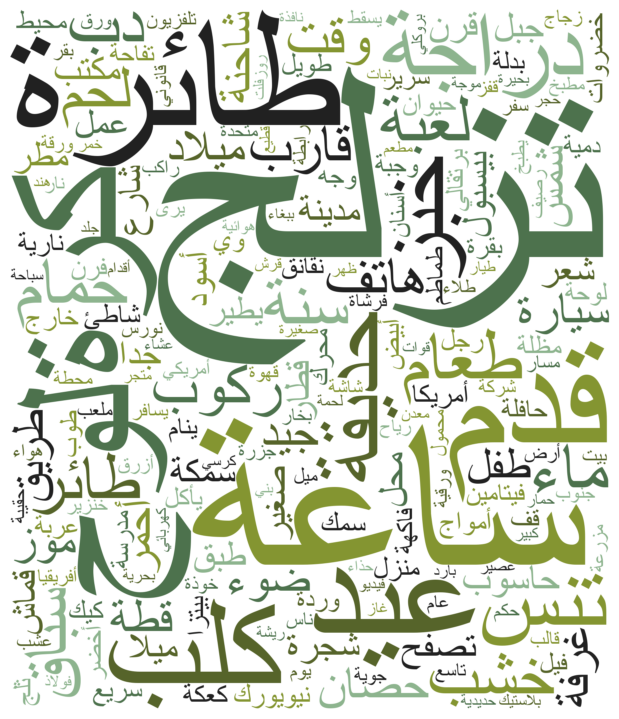

In [ ]:
import json
import re
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Paths to JSON files
json_file_paths = [
    "/content/drive/MyDrive/ColabData/OKVQA/OKVQA_Statistics/annotation_train_CAMeL_tokenized.json",
    "/content/drive/MyDrive/ColabData/OKVQA/OKVQA_Statistics/annotation_val_CAMeL_tokenized.json"
]

# Load Arabic stopwords
arabic_stopwords = set(stopwords.words('arabic'))
manuall_stopwords = set(["في","على","و","التي",'تاسع',"تاسع","الذي","هو","هي","غير","لماذا", "لهذا", "بهذا","أنه","إليه","اي","لأي","بهذه","لهذه","يتم","عليها","أعلى","تم","يسار","يمين"]) # Add more as needed
arabic_stopwords = arabic_stopwords.union(manuall_stopwords)
# Function to preprocess text
def preprocess_text(text):
    # Remove digits
    text = re.sub(r"\d+", "", text)
    # Remove punctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Remove English words
    text = re.sub(r"[a-zA-Z]+", "", text)
    # Remove Arabic stopwords and "ال" with conditions
    if text not in arabic_stopwords: #check if the token is not in stop words before doing any thing
        if text.startswith("ال") and len(text) > 2 and text not in arabic_stopwords:
          text = text[2:]
    else:
        text="" #make the token empty if it is in stop words
    return [text] if text else []

all_words = []
for file_path in json_file_paths:
    with open(file_path, "r", encoding="utf-8") as file:
        data = json.load(file)
        tokenized_answers = data.get('tokenized_answers', [])
        for question in tokenized_answers:
            for token in question:  # Iterate through each token
                processed_token = preprocess_text(token)  # Preprocess individually
                #Add if statement to consider the case when the preprocess return empty []
                if processed_token: #only extend if not empty
                  all_words.extend(processed_token)  # Extend if not empty

# Calculate word frequencies
word_frequencies = Counter(all_words)

# Define desired colors
colors = ['#8DB48E', '#4D724D', '#56642A', '#212121', '#849531']

# Define a function to cycle through the colors
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color_index = random_state.randint(0, len(colors) - 1)
    return colors[color_index]

# Generate the word cloud using word frequencies
wordcloud = WordCloud(width=1800, height=2100, background_color="white", stopwords=arabic_stopwords, font_path='/content/drive/MyDrive/Colab Notebooks/Dataset Analysis/arial.ttf', color_func=color_func).generate_from_frequencies(word_frequencies)

# Display and save the word cloud
plt.figure(figsize=(6, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("/content/drive/MyDrive/ColabData/OKVQA/OKVQA_Statistics/OKVQA-ar_answers_word_cloud_CAMeL_Tokenized_highResolution.jpg", dpi=300, bbox_inches='tight')
plt.show()
#wordcloud.to_file("wordcloud.png")  # Save to a file



---

